In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

%config InlineBackend.figure_format = 'svg'


In [15]:
df = pd.read_csv("Data Set.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Have to clean the missing values for TotalCharges and convert the column to float

In [17]:
df['TotalCharges'] = df['TotalCharges'].str.replace(" ","NaN")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
df_churn = df[df['Churn'] == 'Yes']
df_not_churn = df[df['Churn'] == 'No']

In [22]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

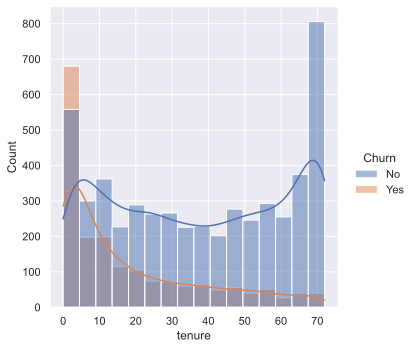

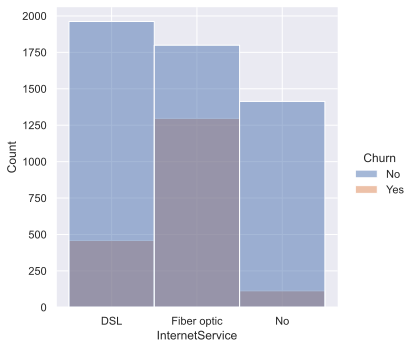

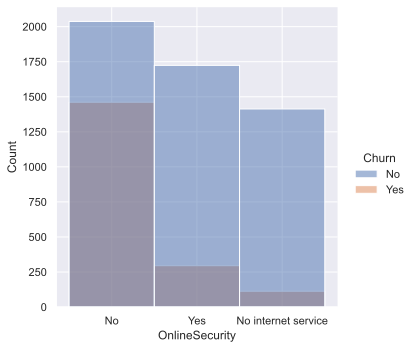

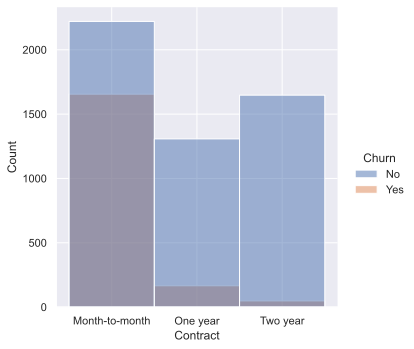

In [20]:
possible_features_numeric = ['tenure', 'TotalCharges', 'MonthlyCharges']

sns.displot(
    data=df, x="tenure", kde=True, hue='Churn'
)

sns.displot(
        data=df, x="InternetService", kde=False, hue='Churn'

)

sns.displot(
    data=df, x='OnlineSecurity', hue='Churn'
)

sns.displot(
    data=df, x='Contract', hue='Churn'
)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

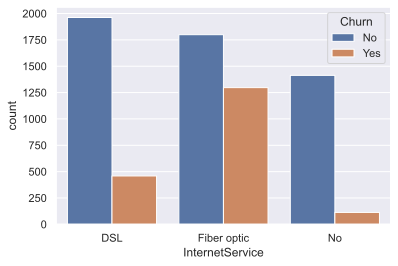

In [7]:
sns.countplot(x="InternetService", hue="Churn", data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

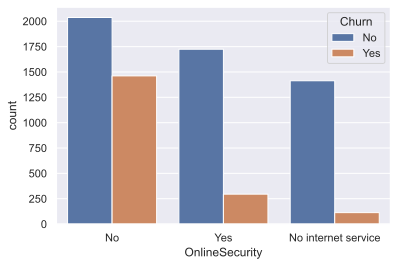

In [8]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

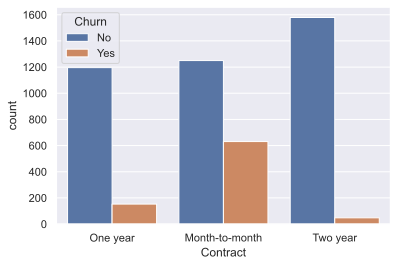

In [9]:
sns.countplot(x='Contract', hue='Churn', data=df[df['tenure'] > 12])

In [10]:
# tech_support_features = [[]]

# sns.countplot(x='InternetService', data=df[df['TechSupport'] == 'Yes'])


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

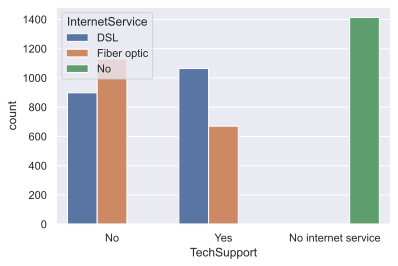

In [11]:
sns.countplot(x='TechSupport', hue='InternetService', data=df[df['Churn'] == 'No'])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

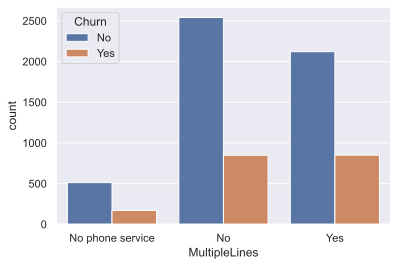

In [12]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)